#### Decision Tree Classification

In [19]:
# imports
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix ,recall_score ,precision_score,f1_score,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings("ignore")

In [20]:
# reads
X1 = pd.read_csv('Error_50k+test+10e_may18.csv')

In [21]:
Y = X1['Rating']
X1 = X1.drop('Rating',1)



In [22]:
# splitting into training and testing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, train_size=0.8,test_size = 0.2, random_state = 7)


In [23]:
print(x1_test.columns[10])
print(x1_test.columns[11])
print(x1_test.columns[12])

EnrollmentType
mathSequenceBreak
englishSequenceBreak


In [24]:
# function to display the tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

def displayTree(clf):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data,  
                filled=True,class_names=True,
                special_characters=True)       
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    tree = graph.create_png()
    return tree

In [25]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [26]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
# Visualize the results in ROC-AUC
def visualize_results(pred_roc,num_classes,y):
    unique, counts = np.unique(pred_roc, return_counts=True)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['navy', 'turquoise', 'darkorange', 'aqua', 'teal','green','red','black','brown','pink'])
    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')

    for i, color in zip(range(num_classes), colors):
        l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
        lines.append(l)
        labels.append('TPR-FPR for class {0} (area = {1:0.2f})'
                      ''.format(i, roc_auc[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Extension of FPR-TPR curve to multi-class')
    
    plt.legend(lines, labels, loc=(0, -.5), prop=dict(size=14))
    plt.show()


#### Decision Tree classification for non normalized data

Training time = 0.0011309999999999931
Cross validation score= [0.61290323 0.6        0.76666667 0.7        0.8        0.55172414
 0.60714286 0.60714286 0.51851852 0.51851852]
Accuracy Score =  0.5689655172413793
Confusion Matrix 

Normalized confusion matrix
[[0.66666667 0.33333333 0.         0.         0.        ]
 [0.2        0.46666667 0.33333333 0.         0.        ]
 [0.10344828 0.         0.48275862 0.4137931  0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.33333333 0.66666667]]
AxesSubplot(0.025,0.150621;0.76x0.756323)
Confusion matrix, without normalization
[[ 2  1  0  0  0]
 [ 3  7  5  0  0]
 [ 3  0 14 12  0]
 [ 0  0  0  8  0]
 [ 0  0  0  1  2]]
AxesSubplot(0.025,0.150621;0.76x0.756323)
Classification Report 

             precision    recall  f1-score   support

          0       0.25      0.67      0.36         3
          1       0.88      0.47      0.61        15
          2       0.74      0.48      0.58        2

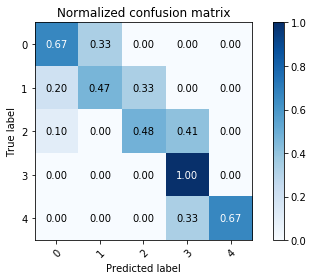

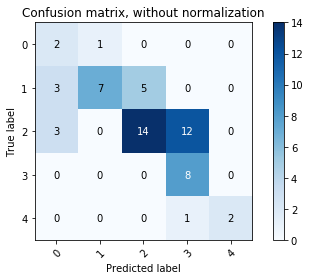

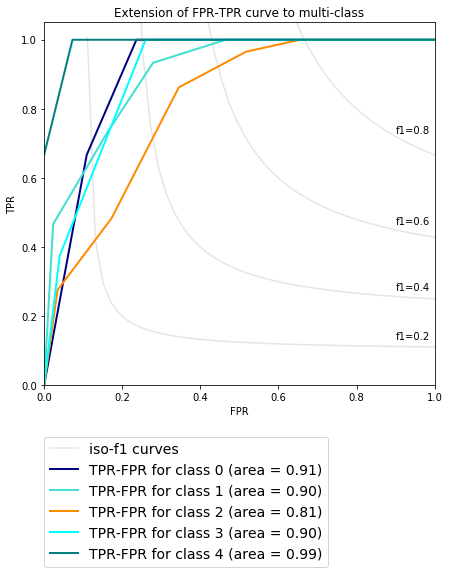

None


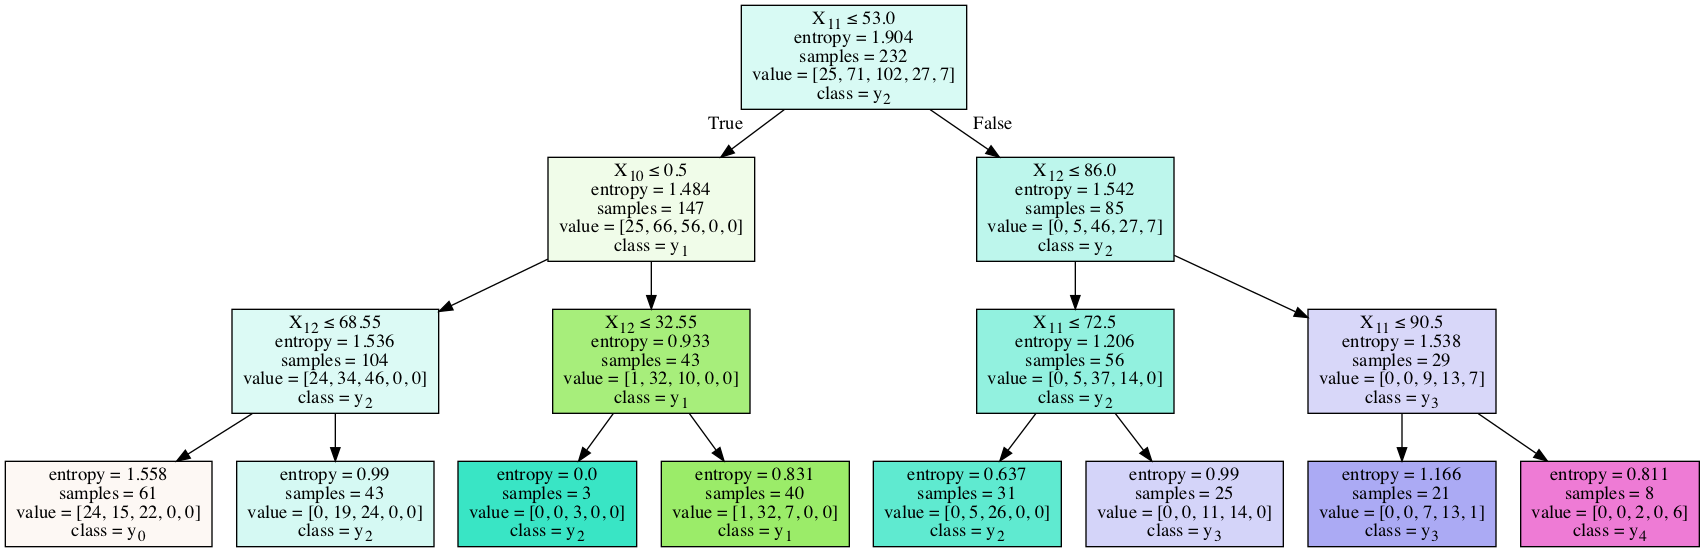

In [27]:
import time

    # The parameters are used from the GridSearch results.
    # gini index is used to measure the impurity
    # min_samples_leaf : The minimum number of samples required for a node to be a leaf node.
dtree_clf = DecisionTreeClassifier(criterion = "entropy", 
            max_depth=3,random_state = 10)   

scores = cross_val_score(dtree_clf, X1,Y, cv=10)
start1 = time.clock() 
dtree_clf.fit(x1_train, y1_train) 
end = (time.clock() - start1)
# training time
print("Training time =", end)
print("Cross validation score=",scores)
y_pred = dtree_clf.predict(x1_test)
print("Accuracy Score = " ,accuracy_score(y1_test, y_pred) )
print("Confusion Matrix \n")
# print(confusion_matrix(y1_test,y_pred))
print(plot_confusion_matrix(y1_test,y_pred,classes={0,1, 2, 3, 4, 5},normalize=True))
print(plot_confusion_matrix(y1_test,y_pred,classes={0,1, 2, 3, 4, 5}))
print("Classification Report \n")
print(classification_report(y1_test,y_pred))
# number of classes for ROC
y = label_binarize(y1_test, classes=[0,1, 2, 3, 4])
num_classes = y.shape[1]
pred_roc = dtree_clf.predict_proba(x1_test)

print(visualize_results(pred_roc,num_classes,y))
graph = displayTree(dtree_clf)
Image(graph)